
# 17 In-Class Assignment: Linear Dynamical Systems 

<img alt="Image with the words COVID-19 and a render image of the virus" src="https://www.dshs.state.tx.us/uploadedImages/Content/Consumer_and_External_Affairs/coronavirus/banner.png" width="80%">

Image from: [https://www.dshs.state.tx.us/coronavirus/default.aspx](https://www.dshs.state.tx.us/coronavirus/default.aspx)

    

### Agenda for today's class (80 minutes)

0. (40 minutes) Review for Quiz 4
1. [(25 minutes) Epidemic Dynamics - Discrete Model](#Epi_discrete)
2. [(15 minutes) Epidemic Dynamics - Continuous Model](#Epi_continuous)

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

---
<a name="Epi_discrete"></a>
## 1. Epidemic Dynamics - Discrete Model

The dynamics of infection and the spread of an epidemic can be modeled as a linear dynamical system, specifically a Markov model. 

We count the fraction of the population in the following four states:
1. Susceptible: the individuals can be infected next day
2. Infected: the infected individuals 
3. Recovered (and immune): recovered individuals from the disease and will not be infected again
4. Deceased: the individuals died from the disease

We denote the fractions of the population in each these four states on day $t$ in a state vector $x_t \in \mathbb{R}^4$. For example $x_t = [0.8,0.1,0.05,0.05]^T$ means that on day $t$, $80\%$ of the population are susceptible, $10\%$ are infected, $5\%$ are recovered and immune, and $5\%$ are deceased.

We choose a simple model here. After each day,

+ 5% of the susceptible individuals will get infected 
+ 3% of infected individuals will die
+ 10% of infected individuals will recover and become immune to the disease
+ 4% of infected individuals will recover but will not be immune to the disease
+ 83% of the infected individuals will remain infected

Then, if we know the fraction of the population in each of the four states on day $t$, i.e., $x_t$, we can compute the fraction of the population in each of the four states on day $t+1$ (the next day) via the equation $$x_{t+1} = Px_t$$ where $P$ is the $4 \times 4$ state transition matrix whose $(i,j)$-th entry is the fraction of individuals in state $j$ on day $t$ who will be in state $i$ on the next day. For this scenario, the matrix $P$ is $$P = \begin{bmatrix} 0.95 & 0.04 & 0 & 0 \\ 0.05 & 0.83 & 0 & 0 \\ 0 & 0.1 & 1 & 0 \\ 0 & 0.03 & 0 & 1\end{bmatrix}.$$

&#9989;  **<font color=red>Do this:</font>** Suppose we start with an initial state vector of $x_0 = [1, 0, 0, 0]^T$ for day $t = 0$, i.e., everyone is alive and susceptible to becoming infected. The `for` loop below calculates the fraction of the population in each of the four states on day $t = 50$, i.e., $x_{50}$ by repeatedly multiplying the current day's state vector by the probability transition matrix $P$ to get the next day's state vector.

In [3]:
P = np.matrix([[0.95, 0.04, 0, 0],[0.05, 0.83, 0, 0],[0, 0.1, 1, 0],[0,0.03,0,1]])
x0 = np.matrix([[1],[0],[0],[0]])
x  = x0
for t in range(50):
    x = P*x
print(x)

[[0.15041595]
 [0.05576501]
 [0.61063003]
 [0.18318901]]


If everything worked correctly, you should see that on day $t = 50$, roughly $15.04\%$ of the population is still susceptible to this infection, $5.58\%$ of the population are infected, $61.06\%$ of the population are recovered and immune, and $18.32\%$ of the population are deceased. 


We can also derive an explicit formula for the state vector on day $t$ in terms of the state transition matrix $P$ and the initial state vector $x_0$. By repeatedly using the recursive relation $x_{t+1} = Px_t$, we find that the state vector on day $1$ is $$x_1 = Px_0,$$ the state vector on day $2$ is $$x_2 = Px_1 = P(Px_0) = P^2x_0,$$ the state vector on day $3$ is $$x_3 = Px_2 = P(P^2x_0) = P^3x_0,$$ the state vector on day $4$ is $$x_4 = Px_3 = P(P^3x_0) = P^4x_0,$$ and in general, the state vector on day $t$ is $$x_t = P^tx_0.$$

So to compute the state vector on day $t$, we need to compute the matrix $P$ raised to the $t$-th power. If $t$ is large, multiplying $P$ by itself $t$ times can take a while. But as we previously learned, we can compute high powers of a matrix via diagonalization. Specifically, if the $4 \times 4$ matrix $P$ has $4$ linearly independent eigenvectors, we can write $P = VDV^{-1}$ where $D$ is a diagonal matrix whose diagonal entries are the eigenvalues of $P$ and $V$ is a matrix whose columns are the eigenvectors of $P$. Then, $P^t = VD^tV^{-1}$ where $D^t$ is simply a diagonal matrix whose entries are the eigenvalues of $P$ raised to the $t$-th power. Hence, $x_t = P^tx_0 = VD^tV^{-1}x_0$. 

&#9989;  **<font color=red>Do this:</font>** In the cell below, first find the eigenvalues and eigenvectors of $P$. Then, use these to construct the matrices $D$ and $V$ to diagonalize $P = VDV^{-1}$. Then, compute $x_{50} = VD^{50}V^{-1}x_0$ and see if you get the same state vector as you did via the above `for` loop.


In [12]:
#Put your answer to the above question here

vals, eigs = np.linalg.eig(P)

D = vals * np.identity(4)

V = eigs


x50 = V * np.linalg.matrix_power(D,50) * np.linalg.inv(V) * x0

np.allclose(x50,x)

True

In [15]:
np.linalg.matrix_power(D,100000000000000000)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Now, let's consider what happens to our population in the long-run, i.e., the limit of the state vector as $t \to \infty$. 

Since $$x_t = P^tx_0 = VD^tV^{-1}x_0,$$ the limit is $$\displaystyle\lim_{t \to \infty}x_t = \lim_{t \to \infty}VD^tV^{-1}x_0 = V\left(\lim_{t \to \infty}D^t\right)V^{-1}x_0.$$

So to figure out the limit of our state vector as $t \to \infty$, we need to figure out what happens to the matrix $D^t$ as $t \to \infty$. 

&#9989;  **<font color=red>Do this:</font>** Write down the following: 
1. the matrix $D$ that you got when diagonalizing $P$
2. the result of raising $D$ to the $t$-th power (this will depend on $t$)
3. the limit of $D^t$ as $t \to \infty$ (think about what happens when $t$ gets really big)

$$D = \begin{bmatrix}1 & & & \\ & 1 & & \\ & & .964 & \\ & & & .815\end{bmatrix}$$

$$D^t = \begin{bmatrix}1 & & & \\ & 1 & & \\ & & .166 & \\ & & & .0000365\end{bmatrix}$$

$$\lim_{t \to \infty}D^t = \begin{bmatrix}1 & & & \\ & 1 & & \\ & & 0 & \\ & & & 0\end{bmatrix}$$

&#9989;  **<font color=red>Do this:</font>** In the cell below, compute the limit of the state vector $\displaystyle\lim_{t \to \infty}x_t$ using the formula $\displaystyle V\left(\lim_{t \to \infty}D^t\right)V^{-1}x_0$ along with the value of $\displaystyle\lim_{t \to \infty}D^t$ that you calculated.

In [19]:
#Put your answer to the above question here

lim_dt = np.linalg.matrix_power(D,100000000000000000)

lim = V * (lim_dt) * np.linalg.inv(V) * x0

lim

matrix([[0.        ],
        [0.        ],
        [0.76923077],
        [0.23076923]])

&#9989;  **<font color=red>Do this:</font>** Based on your calculation of $\displaystyle\lim_{t \to \infty}x_t$ above, when this epidemic is over, what percentage of the population will have died and what percentage of the population survived?

76% of people survived. 23 % of people died

&#9989;  **<font color=red>Do this:</font>** Let's check that our state vector $x_t$ does actually converge to the limit that we computed. Write code to compute $x_t$ for $t = 0,1,2,\ldots,200$ and plot each of the four components of $x_t$ vs. $t$, i.e., plot the fraction of the population that is in each of the four states over the first $200$ days. You may compute the state vectors $x_t$ either iteratively or via diagonalization, whichever you prefer.

Hint: You will likely want to store the state vectors $x_0, x_1, x_2, \ldots, x_{200}$ as columns in a $4 \times 201$ numpy array (or matrix), and then plot each row.

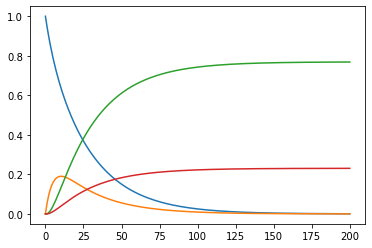

In [37]:
#Put your answer to the above question here

S = np.zeros((4,201))

S[:, 0] = np.array([1,0,0,0])

for i in range(1, 201):
    S[:, i] = P @ S[:, i - 1]
    
plt.plot(S[0,:])
plt.plot(S[1,:])
plt.plot(S[2,:])
plt.plot(S[3,:])

---
<a name="Epi_continuous"></a>
## 2. Epidemic Dynamics - Continuous Model

Instead of using the discrete markov model, we can also use a continuous model with ordinary differential equations. 

Let $y_1(t)$, $y_2(t)$, $y_3(t)$, and $y_4(t)$ denote the fraction of the population that is susceptible, infected, immune, and deceased respectively at time $t$. Consider the following model:

$$\begin{align*}
\dot{y}_1(t) &= {dy_1(t)\over dt} = -0.05y_1(t)+ 0.04 y_2(t) \\
\dot{y}_2(t) &= {dy_2(t)\over dt} = 0.05y_1(t)-0.17 y_2(t) \\ 
\dot{y}_3(t) &= {dy_3(t)\over dt}= 0.1 y_2(t) \\
\dot{y}_4(t) &= {dy_4(t)\over dt} = 0.03 y_2(t)
\end{align*}$$

with initial conditions $y_1(0) = 1$ and $y_2(0) = y_3(0) = y_4(0) = 0$, i.e., everyone is susceptible.

The equation for $\dot{y}_1(t)$ models the fact that the fraction of the population that is susceptible $y_1(t)$ decreases as susceptible people become infected, and it increases as infected people recover without becoming immune to the epidemic. You can come up with similar rationales for the other three equations.

We can write this system of differential equations in matrix form $\dot{y}(t) = Ay(t)$, i.e.,

$$\underbrace{\begin{bmatrix}\dot{y}_1(t) \\ \dot{y}_2(t) \\ \dot{y}_3(t) \\ \dot{y}_4(t)\end{bmatrix}}_{{\huge \dot{y}(t)}} = \underbrace{\begin{bmatrix}a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4} \\ a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4} \\ a_{3,1} & a_{3,2} & a_{3,3} & a_{3,4} \\ a_{4,1} & a_{4,2} & a_{4,3} & a_{4,4}\end{bmatrix}}_{{\huge A}}\underbrace{\begin{bmatrix}y_1(t) \\ y_2(t) \\ y_3(t) \\ y_4(t)\end{bmatrix}}_{{\huge y(t)}}$$ for some constants $a_{i,j}$. 

&#9989;  **<font color=red>Do this:</font>** Create the $4 \times 4$ matrix $A$ in Python below

In [ ]:
# Put your answer to the above question here.


The solution to single variable ODE $\dfrac{dy}{dt} = a y(t)$ with initial condition $y(0) = y_0$ is given by $y(t) = y_0e^{at}$. You can easily check that $y(t) = y_0e^{at}$ is the solution since $y(0) = y_0e^{a \cdot 0} = y_0$ and $\dot{y}(t) = \dfrac{d}{dt}\left[y_0e^{at}\right] = ay_0e^{at} = ay(t)$.

Similarly, it can be shown that the solution to the $n$-variable ODE $\dot{y}(t) = Ay(t)$ with initial condition $y(0) = y_0$ is given by $$y(t) = e^{tA}y_0$$ where $e^{tA}$ is the matrix exponential of $tA$. 

Recall that if $A$ is an $n \times n$ matrix, then the exponential of the matrix $tA$ is the $n \times n$ matrix defined by the series $$e^{tA} = \dfrac{(tA)^0}{0!}+\dfrac{(tA)^1}{1!}+\dfrac{(tA)^2}{2!}+\cdots+\dfrac{(tA)^d}{d!}+\cdots$$

If $A$ has $n$ linearly independent eigenvectors, (so that we can diagonalize $A = CEC^{-1}$ where $C$ is a matrix whose columns are the $n$ linearly independent eigenvectors of $A$, and $E$ is a diagonal matrix with the eigenvalues $\lambda_1,\ldots,\lambda_n$ on the diagonal), then for any real number $t$, the matrix exponential of $tE$ is $$e^{tA} = Ce^{tE}C^{-1}$$ where $e^{tE}$ is a diagonal matrix with the numbers $e^{\lambda_1 t}, e^{\lambda_2 t}, \ldots, e^{\lambda_n t}$ on the diagonal

&#9989;  **<font color=red>Do this:</font>** The code below computes the solution to the system of differential equations at $t = 50$, i.e., $y(50) = e^{50A}y_0$.

In [ ]:
lam, C = np.linalg.eig(A)
Cinv = np.linalg.inv(C)
y0 = np.matrix([[1],[0],[0],[0]])
y50 = C*np.diag(np.exp(50*lam))*Cinv*y0
print(y50)

Note that this continuous model is not exactly the same as the discrete model. So it is expected that $y(50) \neq x_{50}$. However, they should be similar. 

&#9989;  **<font color=red>Do this:</font>** Make a plot of $y_1(t)$, $y_2(t)$, $y_3(t)$, and $y_4(t)$ vs. $t$ over the range $0 \le t \le 200$, and check that the plots look similar to that of the discrete model. 

In [ ]:
y0 = np.matrix([[1],[0],[0],[0]])
y_all = np.matrix(np.zeros((4,201)))

### Your code starts here ###

### Your code ends here ###
for i in range(4):
    plt.plot(y_all[i].T)

If there's still time left in class, consider what happens to our population in the long-run, i.e., $\displaystyle\lim_{t \to \infty}y(t)$.

Since $$y(t) = e^{tA}y_0 = Ce^{tE}C^{-1}y_0,$$ the limit is $$\displaystyle\lim_{t \to \infty}y(t) = \lim_{t \to \infty}Ce^{tE}C^{-1}y_0 = C\left(\lim_{t \to \infty}e^{tE}\right)C^{-1}y_0.$$

So to figure out what happens to our population in the long-run, we need to figure out what happens to the matrix $e^{tE}$ as $t \to \infty$. 

&#9989;  **<font color=red>Do this:</font>** Write down the following: 
1. the matrix $E$ that you got when diagonalizing $A$
2. the matrix exponential $e^{tE}$
3. the limit of $e^{tE}$ as $t \to \infty$ (think about what happens when $t$ gets really big)

$$E = \begin{bmatrix}? & & & \\ & ? & & \\ & & ? & \\ & & & ?\end{bmatrix}$$

$$e^{tE} = \begin{bmatrix}? & & & \\ & ? & & \\ & & ? & \\ & & & ?\end{bmatrix}$$

$$\lim_{t \to \infty}e^{tE} = \begin{bmatrix}? & & & \\ & ? & & \\ & & ? & \\ & & & ?\end{bmatrix}$$

&#9989;  **<font color=red>Do this:</font>** In the cell below, compute $\displaystyle\lim_{t \to \infty}y(t)$ using the formula $\displaystyle C\left(\lim_{t \to \infty}e^{tE}\right)C^{-1}y_0$ along with the value of $\displaystyle\lim_{t \to \infty}e^{tE}$ that you calculated.

In [ ]:
#Put your answer to the above question here

-----

Written by Dr. Dirk Colbry and Dr. Santhosh Karnik, Michigan State University.
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.